In [1]:
import numpy as np

In [2]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline

## Dataset creation

Let's create a sample of examples with one variable $x$, in two categories. 
For category 1, the underlying probability distribution is a Gaussian centered on -1.5 with unit standard deviation. For category 2, the Gaussian is centered on 1.5 . 

In [62]:
normal = np.random.normal
sigma = 1
x1 = normal(-1.5, sigma, 100)
x2 = normal(1.5, sigma, 100)

These two samples can be visualized as a scatter plot, with the category on the y axis:

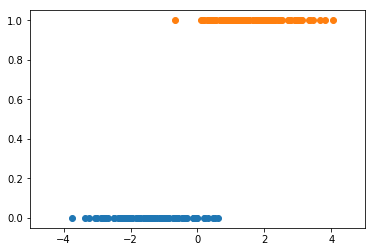

In [63]:
plt.xlim(-5,5)
plt.plot(x1, np.zeros_like(sample1),'o')
plt.plot(x2, np.ones_like(sample2),'o')

And we can also show histograms. For each category, the histogram has 50 bins, that count the number of examples with a value falling in the bin:

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  2.,
         5.,  5.,  4., 10.,  9., 10.,  7.,  5.,  7.,  7.,  6.,  4.,  3.,
         5.,  4.,  2.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.]),
 array([-5. , -4.8, -4.6, -4.4, -4.2, -4. , -3.8, -3.6, -3.4, -3.2, -3. ,
        -2.8, -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8,
        -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,
         1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,
         3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ]),
 <a list of 50 Patch objects>)

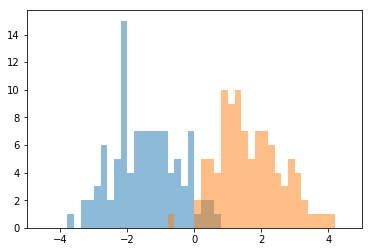

In [64]:
# plt.hist(sample1,bins=50, range=(-5,5))
plt.clf()
plt.xlim(-5,5)
plt.hist(x1,bins=50, range=(-5,5), alpha=0.5)
plt.hist(x2,bins=50, range=(-5,5), alpha=0.5)

By eye, we see that examples from the two samples can be classified by setting a separation boundary at $x=0$. Given an unknown sample, if $x>0$ we classify it to category 1, and to category 0 otherwise.

We are now going to see how the most simple neural network can find the boundary for us. 

But first, we must talk about the sigmoid function. 

## The sigmoid function 

The sigmoid or logistic function is essential in classification problems. In 1D, the sigmoid function is expressed as

$$\sigma(z) = \frac{1}{1+e^{-z}}$$

and here is what it looks like, together with our samples. 

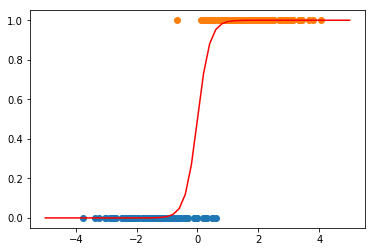

In [77]:
# define parameters
b = 0
w = 5

def sigmoid(x1):
    # z is a linear function of x1
    z = w*x1 + b
    return 1 / (1+np.exp(-z))

# create an array of evenly spaced values
linx = np.linspace(-5,5,51)
plt.plot(x1, np.zeros_like(sample1),'o')
plt.plot(x2, np.ones_like(sample2),'o')
plt.plot(linx, sigmoid(linx), color='red')

Let's understand this function in more details:

* when x goes to infinity, $e^{-x}$ goes to zero, and $\sigma (x)$ goes to one.
* when x goes to minus infinity, $e^{-x}$ goes to infinity, and $\sigma (x)$ goes to zero.
* $\sigma(0) = 0.5$

It is important to note that the sigmoid is bound between 0 and 1, like a probability. And actually, in classification problems, the probability for an example to belong to a given category is produced by a sigmoid function.

Now go back to the cell above, and play a bit with the `b` and `w` parameters, redoing the plot everytime you change one of these parameters. 

* $b$ is the **bias**. Changing the bias simply moves the sigmoid along the horizontal axis. For example, if you choose $b=1$ and $w=0$, then $z = x + b$ takes a zero value at $x=-1$, and that's where the sigmoid will be equal to 0.5
* $w$ is the **weight** of variable $x$. If you increase it, the sigmoid evolves faster as a function of $x$ and gets sharper.

To classify our examples, we could simply use the output of the sigmoid: A given unknown example with value $x$ will be classified to category 1 if $\sigma(z) > 0.5$, and to category 0 otherwise. 

For this classification to work well, we see that the bias $b$ has to be set to 0, and that the weight $w$ does not have any importance (which is not the case in general). 

## The most simple neural network ever

In this section we will build the most simple neural network to classify our examples:

* Each example has one variable, so we need 1 input neuron on the input layer
* We're not going to use any hidden layer, as that would make the network more complicated
* We have two categories, so the output of the network should be a single value between 0 and 1, the probability $p$ for the example to belong to category 1. Then, the probability to belong to category 0 is simply $1-p$. Therefore, we should have a single output neuron, the only actual neuron in the network.

It seems that the sigmoid function somehow has to be used in the output neuron. Indeed, it spits out a value between 0 and 1, and can be used as a classification probability as we have seen in the previous section.

We can represent our network in the following way:

![Neural network with 1 neuron](../images/one_neuron.png)

## Logistic regression

In [7]:
from sklearn.linear_model import LogisticRegression

In [ ]:
x = np.concatenate((sample1, sample2))
y = np.concatenate((target1, target2))

In [8]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(x, y)

In [9]:
clf.predict_proba([[4,4]])

array([[9.96651138e-05, 9.99900335e-01]])

In [10]:
xmin, xmax, npoints = -5, 6, 100
gridx, gridy = np.meshgrid(np.linspace(xmin,xmax,npoints), np.linspace(xmin,xmax,npoints))

In [11]:
grid = np.c_[gridx.ravel(), gridy.ravel()]

In [12]:
prob = clf.predict_proba(grid)

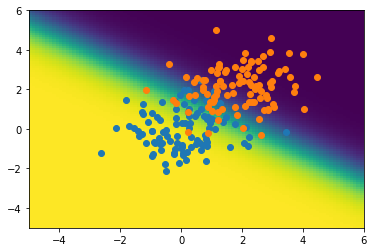

In [13]:
plt.pcolor(gridx,gridy,prob[:,0].reshape(npoints,npoints))
plt.scatter(sample1[:,0], sample1[:,1])
plt.scatter(sample2[:,0], sample2[:,1])

In [14]:
linx = np.linspace(-5,5,51)

## Sigmoid, 2D

Play with b, w1, w2 to get an optimal separation by eye between the two categories

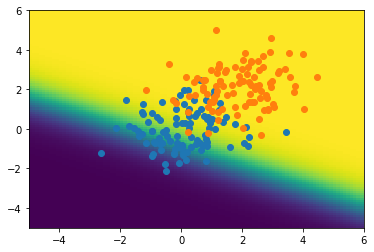

In [15]:
b = 1
w1, w2 = 1, 2
def sigmoid_2d(x1, x2):
    z = w1*x1 + w2*x2 + b
    return sigmoid(z)
prob = sigmoid_2d(gridx, gridy)
plt.pcolor(gridx,gridy,prob)
plt.scatter(sample1[:,0], sample1[:,1])
plt.scatter(sample2[:,0], sample2[:,1])

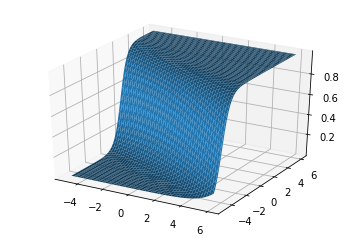

In [16]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(gridx, gridy, prob)

## Dumb neural net

In [233]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(), activation='logistic', alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=1,
                    learning_rate_init=.1, verbose=True)

In [234]:
mlp.fit(x,y)

Iteration 1, loss = 0.62765947
Iteration 2, loss = 0.52756752
Iteration 3, loss = 0.43845764
Iteration 4, loss = 0.37788755
Iteration 5, loss = 0.34320576
Iteration 6, loss = 0.32556243
Iteration 7, loss = 0.31744587
Iteration 8, loss = 0.31395253
Iteration 9, loss = 0.31218237
Iteration 10, loss = 0.31052220
Iteration 11, loss = 0.30814531
Iteration 12, loss = 0.30470025
Iteration 13, loss = 0.30012166
Iteration 14, loss = 0.29451421
Iteration 15, loss = 0.28807966
Iteration 16, loss = 0.28106970
Iteration 17, loss = 0.27375415
Iteration 18, loss = 0.26639883
Iteration 19, loss = 0.25924931
Iteration 20, loss = 0.25251867
Iteration 21, loss = 0.24637812
Iteration 22, loss = 0.24095031
Iteration 23, loss = 0.23630538
Iteration 24, loss = 0.23246025
Iteration 25, loss = 0.22938176
Iteration 26, loss = 0.22699380
Iteration 27, loss = 0.22518810
Iteration 28, loss = 0.22383767
Iteration 29, loss = 0.22281127
Iteration 30, loss = 0.22198684
Iteration 31, loss = 0.22126204
Iteration 32, los

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(), learning_rate='constant',
       learning_rate_init=0.1, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=True,
       warm_start=False)

In [236]:
prob_mlp = mlp.predict_proba(grid)

In [237]:
prob_mlp

array([[9.99999994e-01, 5.89548596e-09],
       [9.99999993e-01, 6.87044244e-09],
       [9.99999992e-01, 8.00663078e-09],
       ...,
       [1.13542667e-07, 9.99999886e-01],
       [9.74302914e-08, 9.99999903e-01],
       [8.36043569e-08, 9.99999916e-01]])

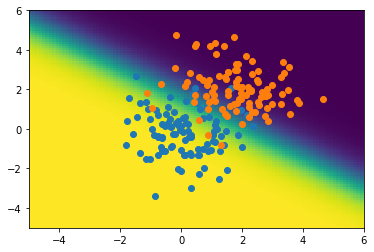

In [238]:
plt.pcolor(gridx,gridy,prob_mlp[:,0].reshape(npoints,npoints))
plt.scatter(sample1[:,0], sample1[:,1])
plt.scatter(sample2[:,0], sample2[:,1])

Iteration 1, loss = 0.68285478
Iteration 2, loss = 0.64462357
Iteration 3, loss = 0.60774282
Iteration 4, loss = 0.56913979
Iteration 5, loss = 0.52993034
Iteration 6, loss = 0.49161571
Iteration 7, loss = 0.45516185
Iteration 8, loss = 0.42144090
Iteration 9, loss = 0.39093432
Iteration 10, loss = 0.36364410
Iteration 11, loss = 0.33936615
Iteration 12, loss = 0.31795152
Iteration 13, loss = 0.29940047
Iteration 14, loss = 0.28377800
Iteration 15, loss = 0.27103764
Iteration 16, loss = 0.26090222
Iteration 17, loss = 0.25291917
Iteration 18, loss = 0.24662276
Iteration 19, loss = 0.24164026
Iteration 20, loss = 0.23771305
Iteration 21, loss = 0.23467716
Iteration 22, loss = 0.23242905
Iteration 23, loss = 0.23088784
Iteration 24, loss = 0.22996022
Iteration 25, loss = 0.22951220
Iteration 26, loss = 0.22935398
Iteration 27, loss = 0.22925111
Iteration 28, loss = 0.22897042
Iteration 29, loss = 0.22834763
Iteration 30, loss = 0.22734066
Iteration 31, loss = 0.22603221
Iteration 32, los

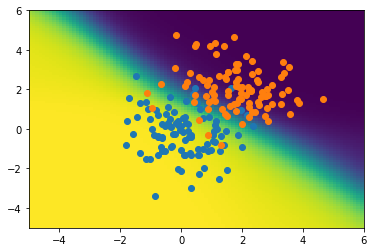

In [249]:
mlp2 = MLPClassifier(hidden_layer_sizes=(5), activation='logistic', alpha=1e-4,
                    solver='adam', tol=1e-4, random_state=1,
                    learning_rate_init=.1, verbose=True)
mlp2.fit(x,y)
prob_mlp2 = mlp2.predict_proba(grid)
plt.pcolor(gridx,gridy,prob_mlp2[:,0].reshape(npoints,npoints))
plt.scatter(sample1[:,0], sample1[:,1])
plt.scatter(sample2[:,0], sample2[:,1])